# Problem 19-48, Sears - Zemansky.

YOUNG, Hugh D., FREEDMAN, Roger A. (2012). *University Physics*. 13th. ed., Pearson.

The graph in Fig. shows a pV-diagram for 3.25 moles of ideal helium (He) gas. Part ca of this process is isothermal. <br>
(a) Find the pressure of the He at point a. <br>
(b) Find the temperature of the He at points a, b, and c. <br>
(c) How much heat entered or left the He during segments ab, bc, and ca? In each segment, did the heat enter or leave? <br>(d) By how much did the internal energy of the He change from a to b, from b to c, and from c to a? Indicate whether this energy increased or decreased.

In [195]:
import pyromat as pm
import numpy as np
import matplotlib.pyplot as plt

In [196]:
#pm.info()

In [197]:
pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'
pm.config['unit_pressure'] = 'kPa'
pm.config['unit_temperature'] = 'K'

In [198]:
he = pm.get('ig.He')

In [212]:
print("molecular weight: ", he.mw(), "kg/kmol")

molecular weight:  4.0026 kg/kmol


$$ m_{He} = M \cdot N $$

In [200]:
m_he = N * he.mw() #kg
print("He mass: ", m_he, "kg")

He mass:  0.01300845 kg


In [201]:
Ru = 8.31447 #kJ/(Kmol*K)
N = 3.25/1000 #kmol

## Tc

$$ T_c = \frac{P_c \cdot V_c}{N \cdot R_u} $$

In [223]:
Pc = 200 #kPa
Vc = 0.04 #m3
Tc = Pc * Vc / (N * Ru) #K
print("T_c = ", round(Tc), "K")

T_c =  296 K


## Pa

$$ P_a = \frac{P_c \cdot V_c}{V_a} $$

In [203]:
Va = 0.01 #m3
Ta = Tc
Pa = (Pc * Vc) / Va
print("P_a = ", Pa, "kPa")

P_a =  800.0 kPa


## Pb

$$ T_b = \frac{P_b}{P_c} \cdot T_c$$

In [215]:
Pb = Pa
Vb = Vc
Tb = (Pb / Pc) * Tc
print('T_c =', round(Tb),' K')

T_c = 1184  K


$$ Q_H $$

$$ Q_H = m_{He} \cdot (h_b - h_a) $$

In [ ]:
QH = m_he * (he.h(Tb,Pb) - he.h(Ta,Pa))
print("Q_H = ", round(QH[0],1), "kJ")

## QH

$$ Q_H = m_{He} \cdot c_p \cdot (T_b - T_a) $$

In [225]:
QH2 = m_he * he.cp() * (Tb - Ta)
print("Q_H = ", round(QH2[0],1), "kJ")

Q_H =  60.0 kJ


$$ \Delta U = m_{He} \cdot c_v \cdot (T_b - T_a) $$

In [226]:
DU = m_he * he.cv() * (Tb - Ta)
print("DU = ", round(DU[0],1), "kJ")

DU =  36.0 kJ


$$ W_{ab} = Q_H - \Delta U $$

In [227]:
Wab = QH - DU
print("W_ab = ", round(Wab[0],1), "kJ")

W_ab =  24.0 kJ


$$ P = \frac{P_a \cdot V_a}{V} $$

In [209]:
V = np.linspace(V1,V2,200,dtype=object)
P = Pa*Va/V

Text(0.5, 0, 'Volume (m3)')

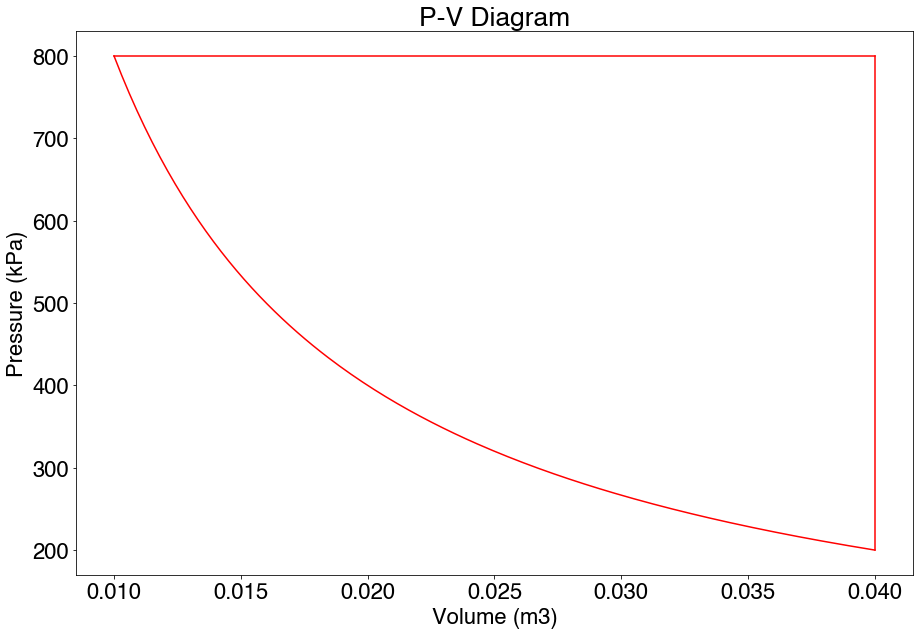

In [210]:
font = {'family' : 'Helvetica',
        'size'   : 22}

plt.figure(figsize=(15,10))
plt.title('P-V Diagram')
plt.rc('font', **font)
plt.plot(V,P,'r',linewidth=1.5)
plt.plot([Va,Vb],[Pa,Pb],'r',linewidth=1.5)
plt.plot([Vb,Vc],[Pb,Pc],'r',linewidth=1.5)
plt.ylabel('Pressure (kPa)')
plt.xlabel('Volume (m3)')